In [6]:
#---PROYECTO 2---
#Angel Ignacio Ortega Vega - 218524155
#Cesar Daniel Gonzalez Giron - 218524988
#Aprendizaje Maquina - D03
#Prof. Robin Fernando Conchas Cedano
#Fecha: 14/05/2025

# Importar librerias
import tensorflow as tf
import matplotlib.pyplot as plt

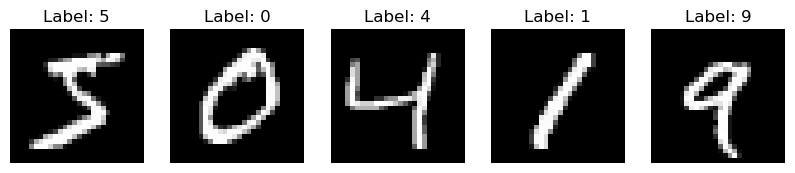

In [7]:
# Importar el dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Dividir el dataset en datos de entrenamiento y de prueba
x_train, x_test = x_train / 255.0, x_test / 255.0 # Transformar de int a float
x_train = x_train.reshape(-1, 28, 28, 1)  # Añadir dimensión del canal (1 para escala de grises) a x_train
x_test = x_test.reshape(-1, 28, 28, 1) # Lo mismo de arriba peron en x_test

# Mostrar 5 imagenes del dataset de entrenamiento
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [8]:
# Creacion del modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Primera capa convolucional
    tf.keras.layers.MaxPooling2D((2, 2)), # Primera capa MaxPooling2D
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional
    tf.keras.layers.MaxPooling2D((2, 2)), # Segunda capa MaxPooling2D
    tf.keras.layers.Flatten(), # Capa Flatten
    tf.keras.layers.Dense(128, activation='relu'),  # Capa densa con ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con softmax
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Función de pérdida

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy']) #Compilación del modelo con el optimizador Adam y la función de pérdida definida

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9142 - loss: 0.2839 - val_accuracy: 0.9801 - val_loss: 0.0638
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9852 - loss: 0.0469 - val_accuracy: 0.9899 - val_loss: 0.0293
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9913 - loss: 0.0290 - val_accuracy: 0.9917 - val_loss: 0.0278
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9930 - loss: 0.0204 - val_accuracy: 0.9890 - val_loss: 0.0354
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9950 - loss: 0.0151 - val_accuracy: 0.9907 - val_loss: 0.0293
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 0.9904 - val_loss: 0.0353
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9967 - loss: 0.0099 - val_accuracy: 0.9907 - val_loss: 0.0299
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9977 - loss: 0

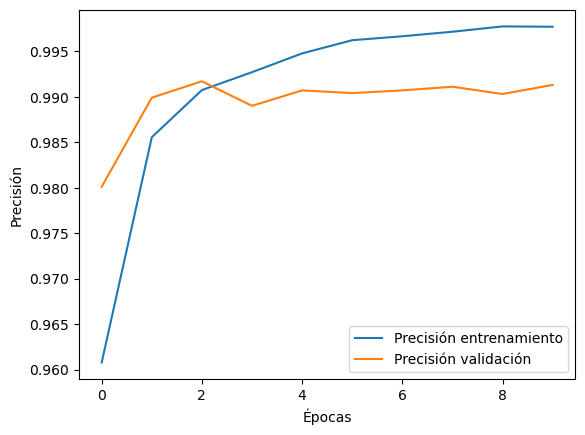

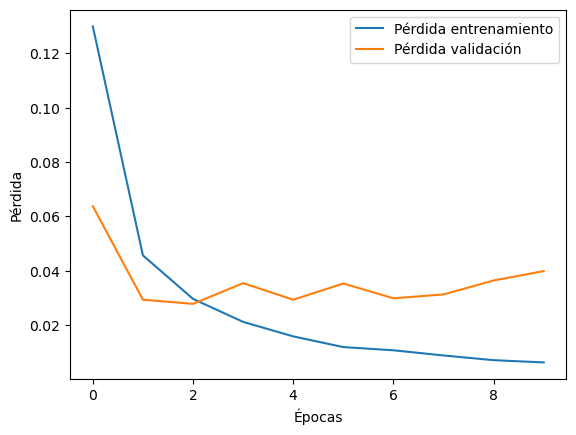

In [10]:
# Entrenamiento del modelo
history = model.fit(
    x_train, y_train, # Datos de entrenamiento
    epochs=10,  # Ajusta las épocas según sea necesario
    validation_data=(x_test, y_test), # Datos de validacion
    verbose=1 # Mostrar los detalles del entrenamiento
)

# Gráficas de precisión y pérdida
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [11]:
model.evaluate(x_test, y_test, verbose=2) #Evaluación del modelo con los datos de prueba

313/313 - 1s - 2ms/step - accuracy: 0.9913 - loss: 0.0399


[0.039860695600509644, 0.9912999868392944]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



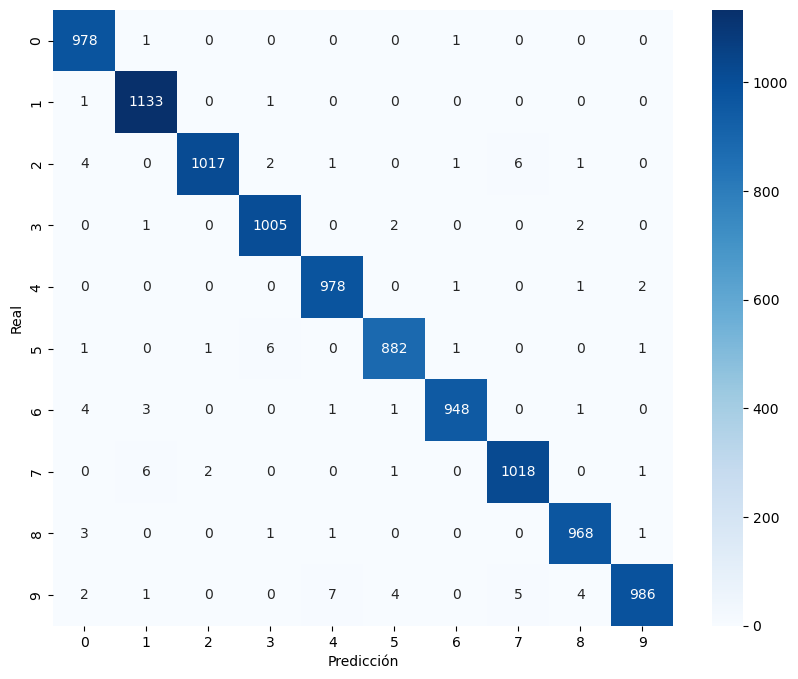

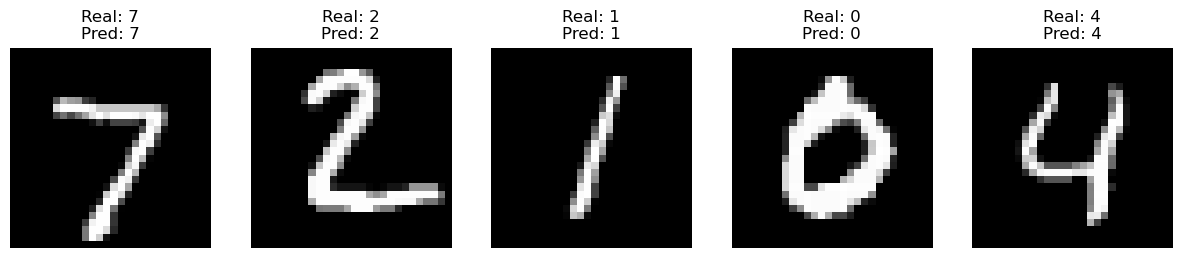

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))  # Muestra precisión y F1-score

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Visualización de predicciones (5 ejemplos)
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {y_test[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

In [13]:
from PIL import Image

def preprocess_image(image_path):
    # Abre la imagen
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    #img_array = 255 - img_array  # Invertir colores (MNIST es fondo negro)
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)  # Formato (1, 28, 28, 1)

    # Muestra la imagen preprocesada
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title("Imagen preprocesada")
    plt.show()
    return img_array

# Predice el numero
def predict_number(image_path, model):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)  # Obtiene las predicciones
    predicted_number = np.argmax(predictions)  # Obtiene la clase con mas probabilidad
    print(f"El numero predecido es: {predicted_number}")

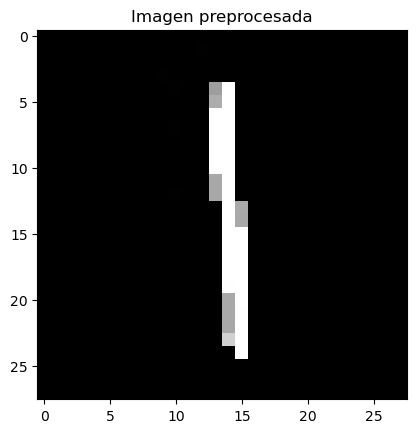

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
El numero predecido es: 1


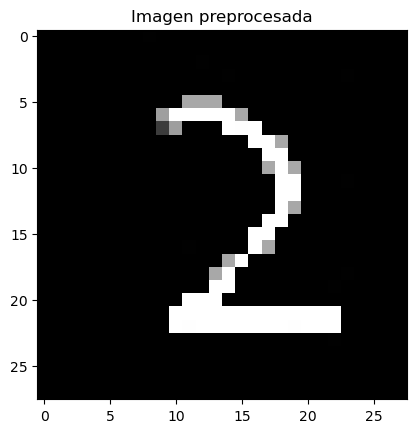

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
El numero predecido es: 2


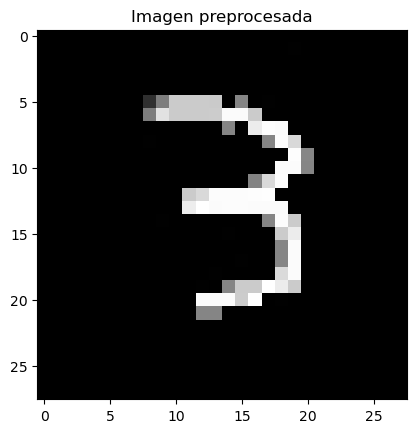

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
El numero predecido es: 3


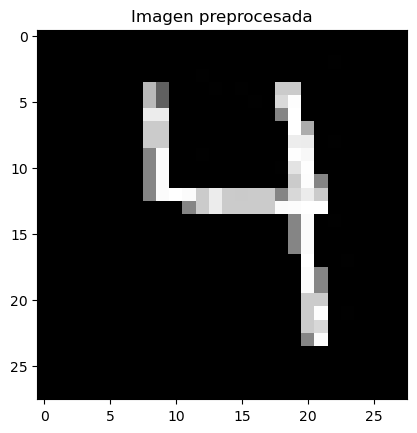

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
El numero predecido es: 4


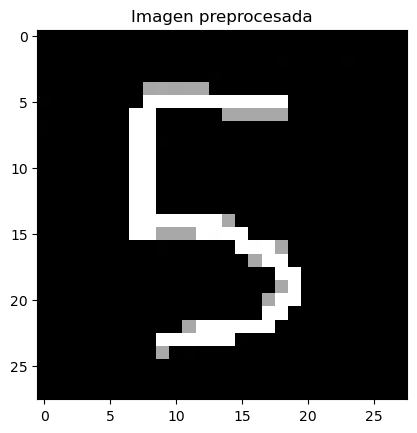

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
El numero predecido es: 5


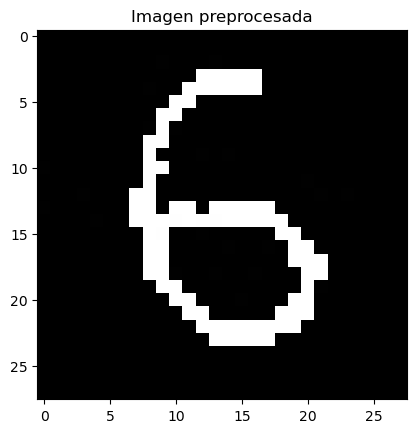

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
El numero predecido es: 6


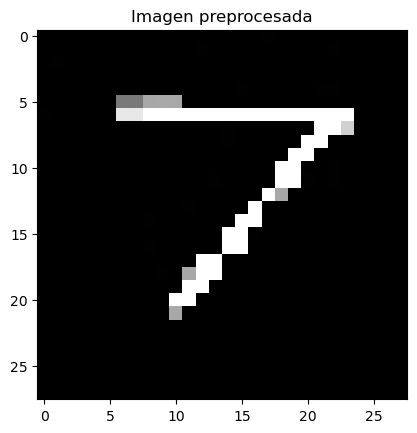

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
El numero predecido es: 7


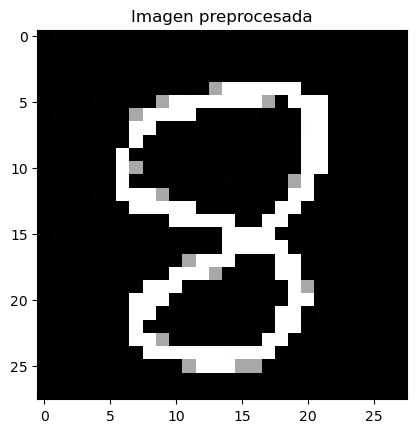

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
El numero predecido es: 8


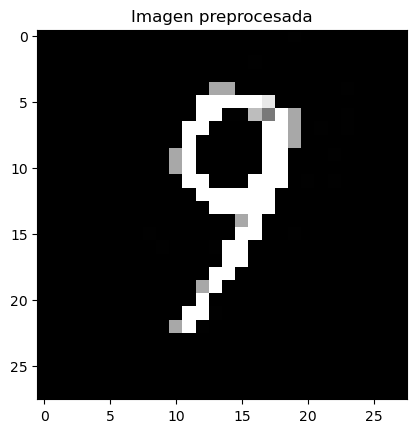

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
El numero predecido es: 9


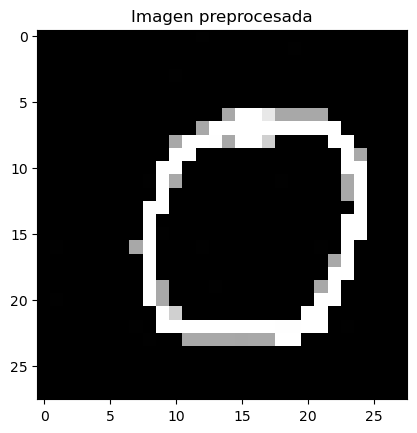

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
El numero predecido es: 0


In [14]:
# Direccion de las imagenes
image_one = 'numbers/1.jpg'
image_two = 'numbers/2.jpg'
image_three = 'numbers/3.jpg'
image_four = 'numbers/4.jpg'
image_five = 'numbers/5.jpg'
image_six = 'numbers/6.jpg'
image_seven = 'numbers/7.jpg'
image_eight = 'numbers/8.jpg'
image_nine = 'numbers/9.jpg'
image_zero = 'numbers/0.jpg'


# Predice los numeros
predict_number(image_one, model)
predict_number(image_two, model)
predict_number(image_three, model)
predict_number(image_four, model)
predict_number(image_five, model)
predict_number(image_six, model)
predict_number(image_seven, model)
predict_number(image_eight, model)
predict_number(image_nine, model)
predict_number(image_zero, model)